# E-Commerce Funnel Analysis

DataSet: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop?utm_source=chatgpt.com

**Analysis Goal**
* visualize the funnel
* calculate conversion rate
* calculate drop-off
  

## Importing Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2>Load and Explore</h2>

In [2]:
df = pd.read_csv('../../../Datasets/FunnelAnalyssi.csv')

In [3]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb
5,2020-01-01 00:00:30 UTC,view,5837111,1783999068867920626,NaN,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
6,2020-01-01 00:00:37 UTC,cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d
7,2020-01-01 00:00:46 UTC,view,5802440,2151191070908613477,NaN,NaN,2.16,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77
8,2020-01-01 00:00:57 UTC,view,5726464,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
9,2020-01-01 00:01:02 UTC,remove_from_cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d


In [4]:
df.shape
    

(4264752, 9)

In [5]:
df.columns.values

array(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


In [7]:
df['event_time'] = pd.to_datetime(df['event_time'])

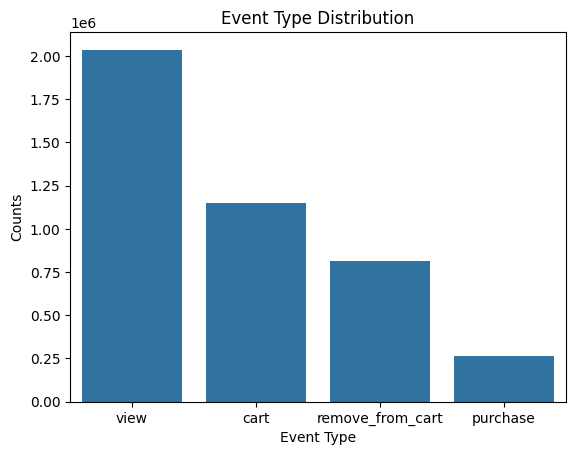

In [9]:
events = df['event_type'].value_counts()

sns.barplot(x=events.index, y= events.values)
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'top 10 most viewd brand')

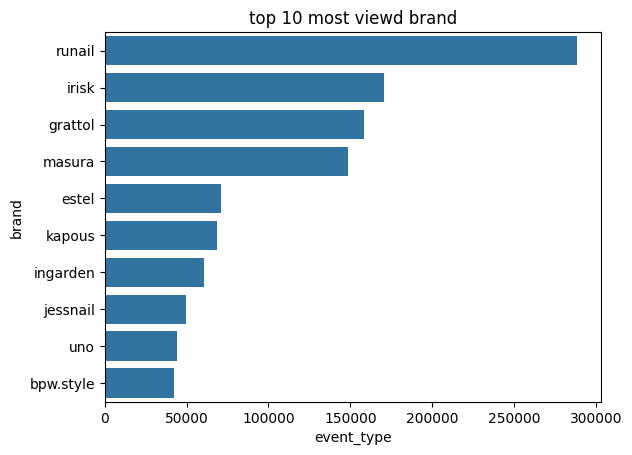

In [18]:
top_brands = (
    df[df['brand'].notna()]
    .groupby('brand')['event_type']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=top_brands, x='event_type', y='brand')
plt.title('top 10 most viewd brand')

## Define and visualize the funnel

In [11]:
funnel_stages = ['view', 'cart', 'purchase']
df = df[df['event_type'].isin(funnel_stages)]

In [12]:
funnel_counts = df['event_type'].value_counts()
funnel_counts

event_type
view        2037608
cart        1148323
purchase     263797
Name: count, dtype: int64

In [13]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel( x=funnel_counts, y=funnel_stages, textinfo = 'value+percent initial'))
fig.show()

Static visual that github can render

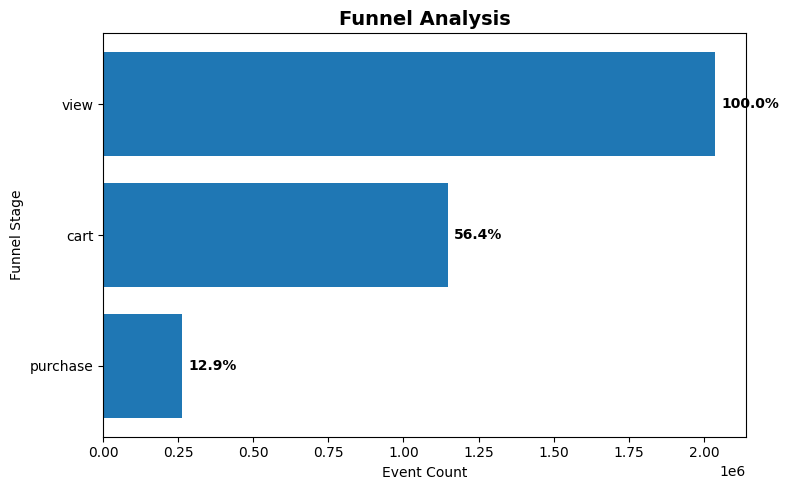

In [19]:
plt.figure(figsize=(8, 5))


bars = plt.barh(funnel_counts.index[::-1], funnel_counts.values[::-1])

# Use the first stage as the base for percentages
total = funnel_counts.iloc[0]


for bar, value in zip(bars, funnel_counts.values[::-1]):
    percentage = (value / total) * 100
    plt.text(
        bar.get_width() + (total * 0.01),
        bar.get_y() + bar.get_height() / 2,
        f'{percentage:.1f}%',
        va='center', ha='left', fontsize=10, fontweight='bold'
    )

plt.title('Funnel Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Event Count')
plt.ylabel('Funnel Stage')
plt.tight_layout()
plt.show()

###  Conversion Rate 

percentage of user who move from one stage to the next



$$
\text{Conversion Rate} = \frac{\text{Users who reached the next stage}}{\text{Users in the previous stage}} \times 100
$$

In [21]:
view_to_cart = (funnel_counts['cart']/funnel_counts['view'])*100
cart_to_purchase = (funnel_counts['purchase']/funnel_counts['cart'])*100

print(f"View → Cart Conversion: {view_to_cart:.2f}%")
print(f"Cart → Purchase Conversion: {cart_to_purchase:.2f}%")

View → Cart Conversion: 56.36%
Cart → Purchase Conversion: 22.97%


### Drop-off Rate

percentage of user who stop befor moving to the next step

$$
\text{Drop-off Rate} = 100\% - \text{Conversion Rate}
$$

In [16]:
view_drop = 100 - view_to_cart
cart_drop = 100 - cart_to_purchase

print(f"View → Cart Drop-off: {view_drop:.2f}%")
print(f"Cart → Purchase Drop-off: {cart_drop:.2f}%")

View → Cart Drop-off: 43.64%
Cart → Purchase Drop-off: 77.03%


# Resources

* https://hex.tech/blog/funnel-analysis/

# Conclusion

* 56.36% of users who viewed a product added it to their cart.
* 22.97 of users whoe added to their cart completed a purchase.
* 77.03% did not complete purchase

the analysis shows  strong user engagement at the browsing (view) stage. but, the conversion rate from cart to purchase is low. this indicates that there could be an issue in the checkout process.